In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preprocessing The Data


In [134]:
df = pd.read_csv('Retail Customer Behavior Analysis.csv', low_memory=False)

In [135]:
df.shape

(1000000, 27)

In [136]:
df.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,transaction_date,quantity,unit_price,...,last_purchase_date,avg_discount_used,preferred_store,total_sales,total_transactions,total_items_purchased,customer_city,customer_state,distance_to_store,days_since_last_purchase
0,1,56,Other,High,No,0,No,10/11/2020 10:08,8,49.72,...,9/11/2021 4:22,0.02,Location A,563.16,69,367,City D,State Y,33.21,40
1,2,69,Female,Medium,No,2,No,12/8/2021 1:07,7,817.76,...,5/16/2021 12:01,0.33,Location C,7554.57,8,475,City A,State X,62.56,338
2,3,46,Female,Low,No,5,No,2/17/2020 9:40,8,270.30,...,2/7/2021 16:47,0.47,Location B,7564.14,73,138,City B,State X,83.04,61
3,4,32,Female,Low,No,0,No,8/13/2020 0:43,2,547.84,...,12/30/2021 23:48,0.41,Location B,8125.92,20,158,City A,State Y,50.43,42
4,5,60,Female,Low,Yes,7,Yes,7/2/2021 11:59,4,785.29,...,11/2/2021 11:48,0.22,Location B,114.32,83,263,City B,State Z,36.55,242


In [137]:
df.isnull().sum()

customer_id                 0
age                         0
gender                      0
income_bracket              0
loyalty_program             0
membership_years            0
churned                     0
transaction_date            0
quantity                    0
unit_price                  0
discount_applied            0
transaction_hour            0
day_of_week                 0
week_of_year                0
month_of_year               0
avg_purchase_value          0
purchase_frequency          0
last_purchase_date          0
avg_discount_used           0
preferred_store             0
total_sales                 0
total_transactions          0
total_items_purchased       0
customer_city               0
customer_state              0
distance_to_store           0
days_since_last_purchase    0
dtype: int64

In [141]:
df.duplicated().sum()

0

In [143]:
print("Column Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
customer_id                   int64
age                           int64
gender                       object
income_bracket               object
loyalty_program              object
membership_years              int64
churned                      object
transaction_date             object
quantity                      int64
unit_price                  float64
discount_applied            float64
transaction_hour              int64
day_of_week                  object
week_of_year                  int64
month_of_year                 int64
avg_purchase_value          float64
purchase_frequency           object
last_purchase_date           object
avg_discount_used           float64
preferred_store              object
total_sales                 float64
total_transactions            int64
total_items_purchased         int64
customer_city                object
customer_state               object
distance_to_store           float64
days_since_last_purchase      int64

In [144]:
# Convert dates to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])


In [147]:
# Calculate percentiles for total sales and total transactions
sales_25th = df['total_sales'].quantile(0.25)
sales_75th = df['total_sales'].quantile(0.75)

transactions_25th = df['total_transactions'].quantile(0.25)
transactions_75th = df['total_transactions'].quantile(0.75)

# Define customer value segments
def assign_segment(row):
    if row['total_sales'] >= sales_75th and row['total_transactions'] >= transactions_75th:
        return 'High-Value'
    elif (sales_25th <= row['total_sales'] <= sales_75th) and (transactions_25th <= row['total_transactions'] <= transactions_75th):
        return 'Medium-Value'
    else:
        return 'Low-Value'

# Apply the function to assign segments
df['customer_segment'] = df.apply(assign_segment, axis=1)


In [148]:

# Check the results
print(df[['customer_id', 'total_sales', 'total_transactions', 'customer_segment']].head(10))


   customer_id  total_sales  total_transactions customer_segment
0            1       563.16                  69        Low-Value
1            2      7554.57                   8        Low-Value
2            3      7564.14                  73        Low-Value
3            4      8125.92                  20        Low-Value
4            5       114.32                  83        Low-Value
5            6      3372.17                  52     Medium-Value
6            7      1322.64                  58        Low-Value
7            8      1716.65                  86        Low-Value
8            9      1358.62                  88        Low-Value
9           10      6757.70                  74     Medium-Value


In [149]:
avg_spending_by_segment = df.groupby('customer_segment')['total_sales'].mean()
print("Average Spending per Segment:\n", avg_spending_by_segment)

Average Spending per Segment:
 customer_segment
High-Value      8763.501453
Low-Value       4712.189484
Medium-Value    5059.068106
Name: total_sales, dtype: float64


In [150]:
# Purchase frequency mode by segment
purchase_frequency_mode = df.groupby('customer_segment')['purchase_frequency'].apply(lambda x: x.mode()[0])
purchase_frequency_mode

customer_segment
High-Value      Weekly
Low-Value       Yearly
Medium-Value     Daily
Name: purchase_frequency, dtype: object

In [151]:
# Store loyalty by segment
store_loyalty = df.groupby('customer_segment')['preferred_store'].nunique().apply(
    lambda x: 'Loyal' if x == 1 else 'Not Loyal'
)

store_loyalty

customer_segment
High-Value      Not Loyal
Low-Value       Not Loyal
Medium-Value    Not Loyal
Name: preferred_store, dtype: object

In [153]:
# Combine results into a summary
behavioral_insights = pd.DataFrame({
    'Average Spending': avg_spending_by_segment,
    'Most Common Purchase Frequency': purchase_frequency_mode,
    'Store Loyalty': store_loyalty
})

# Display the insights
print("Behavioral Insights for Each Customer Segment:")
print(behavioral_insights)

Behavioral Insights for Each Customer Segment:
                  Average Spending Most Common Purchase Frequency  \
customer_segment                                                    
High-Value             8763.501453                         Weekly   
Low-Value              4712.189484                         Yearly   
Medium-Value           5059.068106                          Daily   

                 Store Loyalty  
customer_segment                
High-Value           Not Loyal  
Low-Value            Not Loyal  
Medium-Value         Not Loyal  


In [89]:
# Save the updated DataFrame to a new CSV file
df.to_csv('updated_retail_customer_data.csv', index=False)


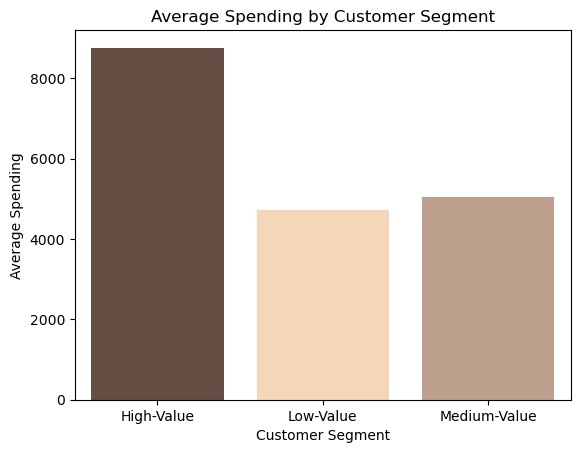

In [204]:
brown_palette = ['#6B4B3E', '#FFD6AF', '#C49E85' , '#CD853F']
# Bar plot
sns.barplot(x=avg_spending_by_segment.index, y=avg_spending_by_segment.values, palette=brown_palette)
plt.title('Average Spending by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Spending')
plt.show()


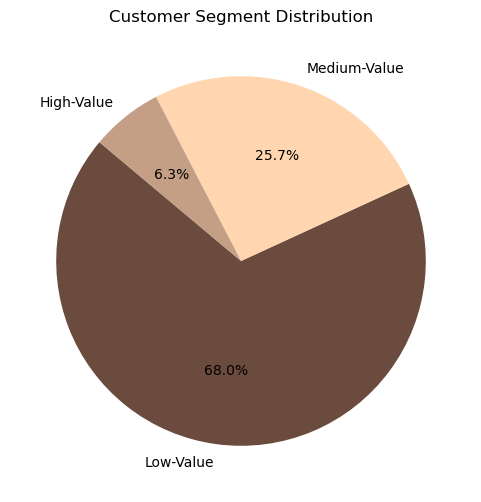

In [182]:
# Pie chart
segment_distribution = df['customer_segment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(segment_distribution, labels=segment_distribution.index, autopct='%1.1f%%', startangle=140, colors=brown_palette)
plt.title('Customer Segment Distribution')
plt.show()


In [188]:
# Data preparation
loyalty_counts = df.groupby(['customer_segment', 'loyalty_program']).size().reset_index(name='counts')

loyalty_counts

,customer_segment,loyalty_program,counts
0,High-Value,No,31360
1,High-Value,Yes,31474
2,Low-Value,No,340241
3,Low-Value,Yes,339457
4,Medium-Value,No,128687
5,Medium-Value,Yes,128781


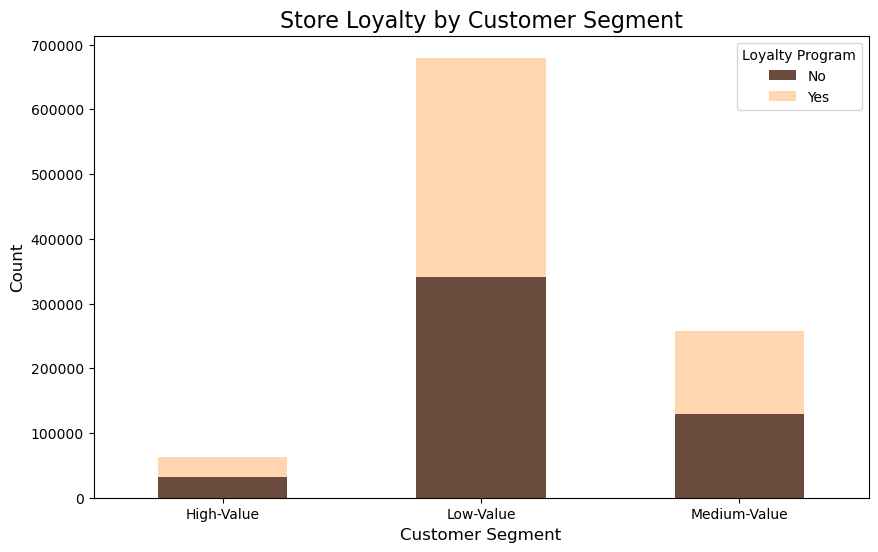

In [198]:

# Pivot the data for visualization
pivot_loyalty = loyalty_counts.pivot(index='customer_segment', columns='loyalty_program', values='counts').fillna(0)

# Plot a stacked bar chart
pivot_loyalty.plot(kind='bar', stacked=True, figsize=(10, 6),color=brown_palette)

plt.title('Store Loyalty by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Loyalty Program', labels=['No', 'Yes'])
plt.show()


In [200]:
# Count purchase frequencies for each customer segment
purchase_frequency_counts = df.groupby(['customer_segment', 'purchase_frequency']).size().reset_index(name='counts')
print(purchase_frequency_counts)

   customer_segment purchase_frequency  counts
0        High-Value              Daily   15618
1        High-Value            Monthly   15788
2        High-Value             Weekly   15938
3        High-Value             Yearly   15490
4         Low-Value              Daily  169451
5         Low-Value            Monthly  169844
6         Low-Value             Weekly  169513
7         Low-Value             Yearly  170890
8      Medium-Value              Daily   64464
9      Medium-Value            Monthly   64300
10     Medium-Value             Weekly   64317
11     Medium-Value             Yearly   64387


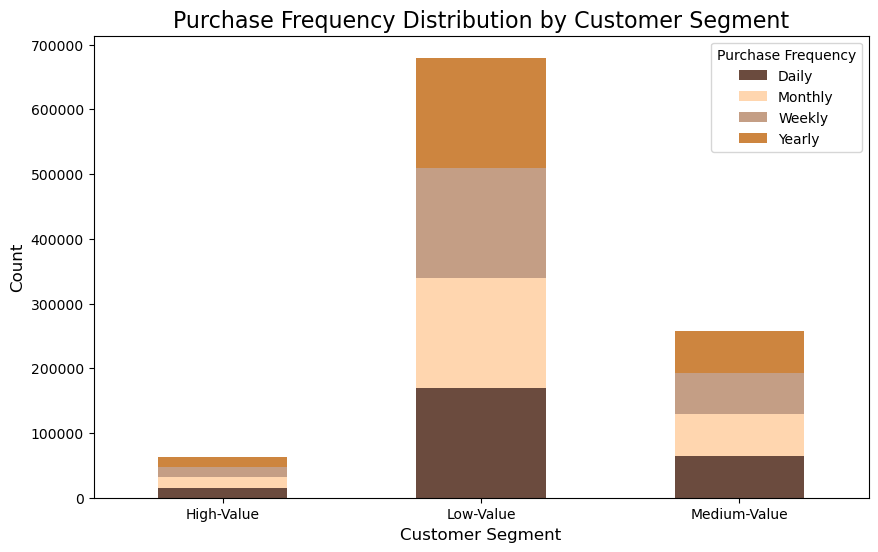

In [206]:


# Pivot the data for visualization
pivot_data = purchase_frequency_counts.pivot(index='customer_segment', columns='purchase_frequency', values='counts').fillna(0)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=brown_palette)

plt.title('Purchase Frequency Distribution by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Purchase Frequency')
plt.show()


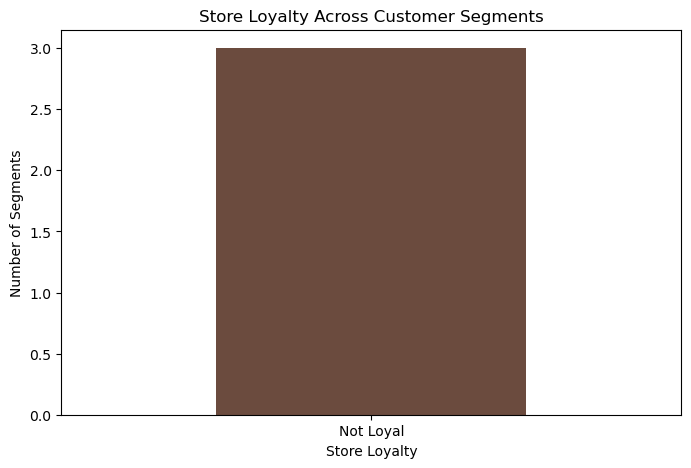

In [210]:

# Extract loyalty counts
loyalty_counts = behavioral_insights['Store Loyalty'].value_counts()

# Plot bar chart
loyalty_counts.plot(kind='bar',color=brown_palette, figsize=(8, 5))
plt.title('Store Loyalty Across Customer Segments')
plt.xlabel('Store Loyalty')
plt.ylabel('Number of Segments')
plt.xticks(rotation=0)
plt.show()
